Linear Regression 
=========================

## Example 1: Linear Regression with a Single Variable/Feature

*This example uses Gradient Descent to minimise the cost function and calculate $\theta$, where $\theta$ is a vector containing the fitting parameters for the hypothesis.*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Generate Data
Here we generate data using the formula for a straight line, $y=mx+c = \theta_0 + \theta_1 x_1 $, and add noise. 

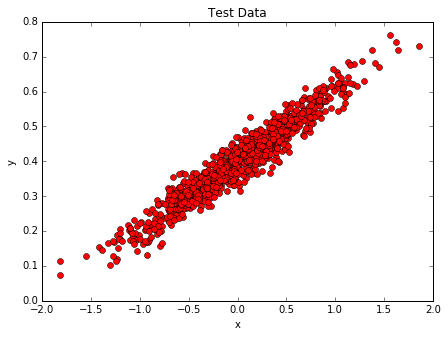

In [11]:
# Generate some data
num_points = 1000
x_data,y_data = [],[]

# Define theta parameters for producing test data - Gradient Descent should produce similar values
t0,t1 = 0.4,0.2

for i in xrange(num_points):
    x = np.random.normal(0.0,0.55)
    y = t0 + (x * t1) + np.random.normal(0.0,0.03)
    x_data.append(x)
    y_data.append(y)

# Plot the test data
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(x_data,y_data, 'ro')
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Setup and Initialise Parameters

The feature matrix $x$ currently only contains a vector of values for $x_1$ for the hypothesis:

$h_{\theta}(x) = \theta_0 + \theta_1 x_1 $,

adding an additional column of 1s enables us to calculate the cost in vectorised form:

$h_{\theta}(x) = (\theta_0\times1) + \theta_1 x_1 = \theta_0 x_0 + \theta_1 x_1 = \theta^Tx$

In [12]:
# size of dataset
m = np.shape(x_data)[0]
# Generate the feature matrix
X = np.column_stack((np.ones(m),x_data)) 
# Initialise theta vector
theta = np.array(np.zeros(2)) 

### Cost Function

The cost function indicates how badly the hypothesis represents the actual data points. During training we try to minimise this cost.

$J(\theta) = \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x_i) - y_i))^2 $

In [13]:
def Cost(X,theta,m,y):

    h = np.dot(X,theta)
    S = np.sum((h - np.transpose(y))**2)
    J = S / (m) # or 2*m

    return J

with the initial $\theta$ vector of zeros we can calculate the cost/error of the hypothesis $h_{\theta}$

In [14]:
# initial cost
cost = Cost(X,theta,m,y_data)
print "initial cost: ", cost

initial cost:  0.16902081141


### Gradient Descent

Gradient descent is an optimisation technique used to minimise the cost function. We iteratively adjust the weights in $\theta$ to produce a better hypothesis.

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x^i) - y^i))x^i_j $

where $i$ is the training sample, $j$ is the index for each weight in $\theta$, and $\alpha$ is the learning rate which indicates how much we adjust the weights in the direction of the gradient.

In [15]:
def GradientDescent(X,y,theta,alpha,iterations,m):
    xTrans = X.transpose() 
    for i in xrange(iterations):

        h = np.dot(X,theta)
        errors = h - y 
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

    return theta

In [16]:
# learning rate
alpha = 0.01 
# No. iterations for Gradient Descent
iterations = 1500
# Run Gradient Descent
theta = GradientDescent(X,y_data,theta,alpha,iterations,m)

### Optimised weights

The optimised $\theta$ values should be similar to the parameters t0,t1 in [2] that we used to generate our noisy test data. Also notice the cost is now much lower compared to when we initialised $\theta$

In [17]:
# new cost after optimisation
cost = Cost(X,theta,m,y_data)
print "theta: ", theta, " cost: ", cost

theta:  [ 0.39947772  0.19491175]  cost:  0.000920022898939


### Plotting the hypothesis

Given that the cost is low, the hypothesis should provide a good fit for our test data.

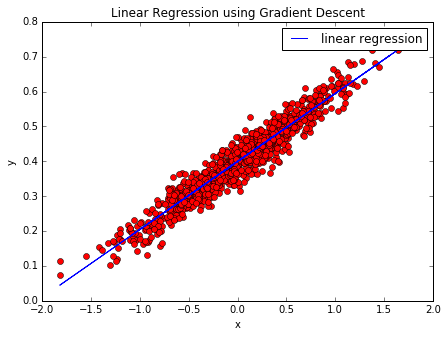

In [18]:
# plot the hypothesis with the learnt fitting values
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
h = np.dot(X,theta) 
plt.plot(x_data,y_data, 'ro')
plt.plot(x_data,h, label="linear regression")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()